In [279]:
#defining gloabals and loading dependencies

datapath = '/Users/300002645/Desktop/Data Science/Zinnov/data/'

OT_books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',

            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',

            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',

            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',

            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',

            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi']

NT_books = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',

            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',

            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',

            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',

            'Revelation']

import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# A custom stoplist
STOPLIST = set(stopwords.words('english'))
# List of symbols we don't care about
SYMBOLS = []
wordnet_lemmatizer = WordNetLemmatizer()
import re
import gensim
from spacy.en import English
parser = English()
import nltk
import string
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [170]:
#helper functions

#mapping book to bible
def book_to_bible(x):
    if x in OT_books:
        return 'OT'
    elif x in NT_books:
        return 'NT'
    else:
        return -1
    
#A custom function to clean the text
def cleanText(text):
    # get rid of newlines
    text = text.strip().replace("\n", " ")
    # lowercase
    text = text.lower()
    return text
    
#tokenize text
def tokenize(text):
    return word_tokenize(text)

#remove stopwords
def remove_stopwords(tokens):
    return [tok for tok in tokens if tok not in STOPLIST]

#remove symbols
def remove_symbols(tokens):
    return [tok for tok in tokens if tok not in SYMBOLS]

#remove punctutations
def remove_punc(tokens):
    return [tok for tok in tokens if tok.isalnum() == True]

#remove numbers
def remove_numbers(tokens):
    return [tok for tok in tokens if tok.isalpha() == True]

#lemmatiser
def lemma_it(tokens):
    lemmas = []
    for tok in tokens:
        lemmas.append(wordnet_lemmatizer.lemmatize(tok))
    return lemmas

#aggregated text preprocesser
def text_preprocess(text):
    return lemma_it(remove_punc(remove_symbols(remove_stopwords(tokenize(cleanText(text))))))

#sample text
text_preprocess('I had 9 LAMBS, but one WeNT crazY@@, could you believe IT!')

['9', 'lamb', 'one', 'went', 'crazy', 'could', 'believe']

In [6]:
#loading data
bible_data = pd.read_csv(datapath+'bible_data_set.csv')
print('sample rows...')
bible_data.head()

sample rows...


,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and the earth. \n
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. \n"
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there was light. \n"
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and God divided the light from the darkness. \n"
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day. \n"


In [8]:
#dropping citation as it is a concat of book, chapter and verse column
bible_data = bible_data.drop(['citation'], axis = 1)
bible_data.head(2)

,book,chapter,verse,text
0,Genesis,1,1,In the beginning God created the heaven and the earth. \n
1,Genesis,1,2,"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. \n"


In [9]:
#adding bible label (3:1 ratio between OT and NT books)
bible_data['bible'] = bible_data.book.apply(book_to_bible)
bible_data.bible.value_counts(normalize=True)

OT    0.744164
NT    0.255836
Name: bible, dtype: float64

In [10]:
bible_data.head()

,book,chapter,verse,text,bible
0,Genesis,1,1,In the beginning God created the heaven and the earth. \n,OT
1,Genesis,1,2,"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. \n",OT
2,Genesis,1,3,"And God said, Let there be light: and there was light. \n",OT
3,Genesis,1,4,"And God saw the light, that it was good: and God divided the light from the darkness. \n",OT
4,Genesis,1,5,"And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day. \n",OT


### EDA


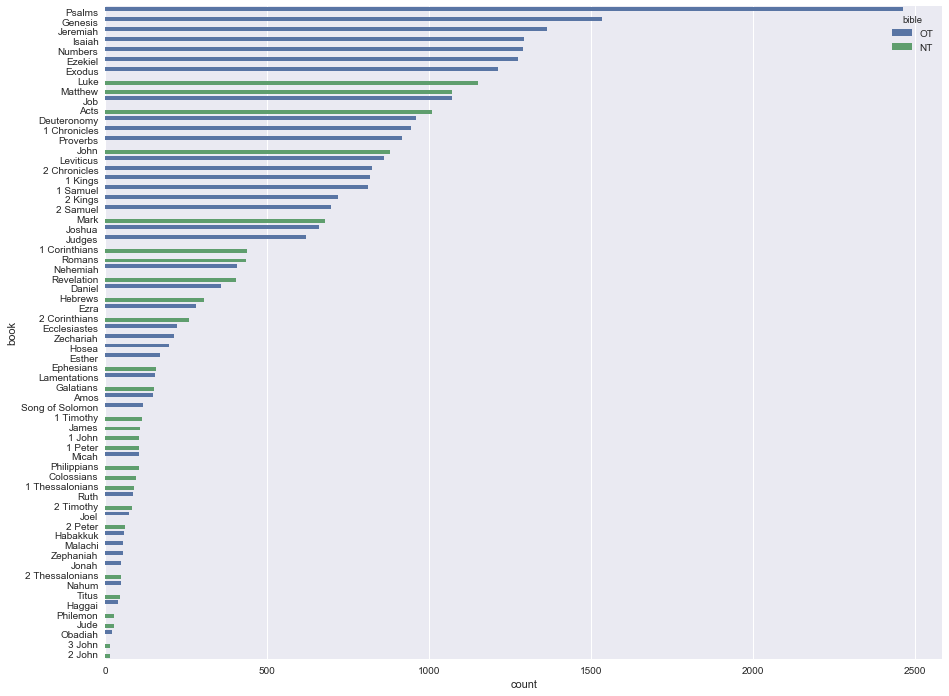

In [11]:
#examining distributions over books and bible
ax = sns.countplot(y="book", 
                   hue="bible", 
                   data=bible_data, 
                   order=bible_data.book.value_counts().index)

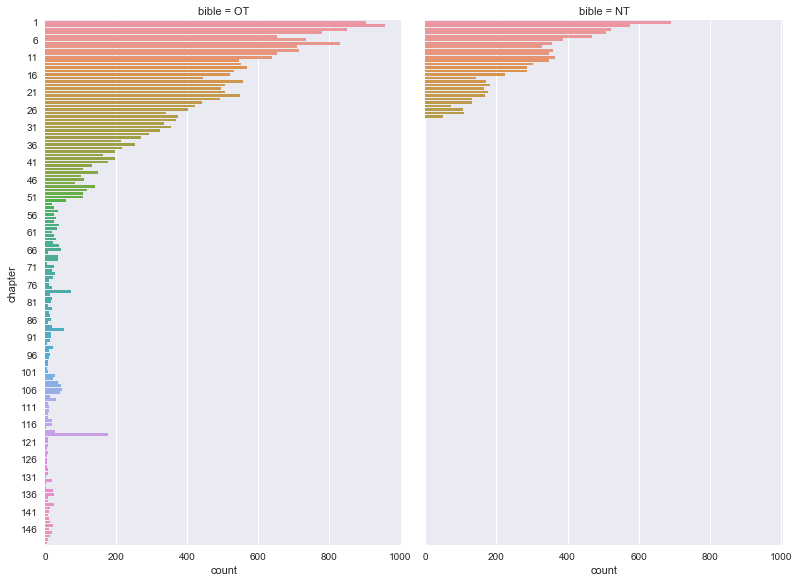

In [12]:
#distribution of chapter by bibles
ax = sns.factorplot(y="chapter", 
                   col="bible", 
                   data=bible_data,
                   kind="count",
                   size=8, aspect=.7)
for x in ax.axes.flat:
    labels = x.get_yticklabels() # get y labels
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' # select every 5th label
    x.set_yticklabels(labels) # set new labels

In [13]:
#stats on chapters distribution by bible
print('OT')
display(bible_data[bible_data.bible == 'OT']['chapter'].describe())
print('NT')
display(bible_data[bible_data.bible == 'NT']['chapter'].describe())

OT


count    23145.000000
mean     24.238367   
std      25.834707   
min      1.000000    
25%      8.000000    
50%      17.000000   
75%      30.000000   
max      150.000000  
Name: chapter, dtype: float64

NT


count    7957.000000
mean     10.138997  
std      7.246575   
min      1.000000   
25%      4.000000   
50%      9.000000   
75%      15.000000  
max      28.000000  
Name: chapter, dtype: float64

It seems that the New Testament books have a maximum of 28 chapters - confirmed on google - the longest book (in terms of chapters) in new testament is Gospel of Matthew with 28 chapters. 

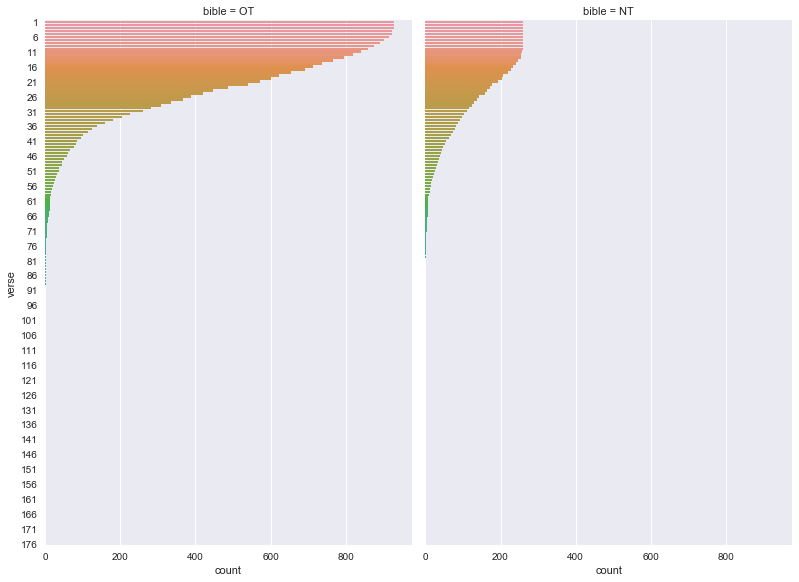

In [14]:
#distribution of verses by bibles
ax = sns.factorplot(y="verse", 
                   col="bible", 
                   data=bible_data,
                   kind="count",
                   size=8, aspect=.7)
for x in ax.axes.flat:
    labels = x.get_yticklabels() # get y labels
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' # select every 5th label
    x.set_yticklabels(labels) # set new labels

In [15]:
#stats on chapters distribution by bible
print('OT')
display(bible_data[bible_data.bible == 'OT']['verse'].describe())
print('NT')
display(bible_data[bible_data.bible == 'NT']['verse'].describe())

OT


count    23145.000000
mean     16.412919   
std      14.131797   
min      1.000000    
25%      7.000000    
50%      14.000000   
75%      22.000000   
max      176.000000  
Name: verse, dtype: float64

NT


count    7957.000000
mean     18.877215  
std      13.747147  
min      1.000000   
25%      8.000000   
50%      16.000000  
75%      27.000000  
max      80.000000  
Name: verse, dtype: float64

In [16]:
#exploring textual data - creating counters for tokens in OT and NT and comparing the most frequent words
all_tokens = []
ot_tokens = []
nt_tokens = []

text_data_all=list(bible_data['text'].values)
text_data_ot=list(bible_data[bible_data.bible=='OT']['text'].values)
text_data_nt=list(bible_data[bible_data.bible=='NT']['text'].values)

for i in text_data_all:
    all_tokens.extend(text_preprocess(i))
for i in text_data_ot:
    ot_tokens.extend(text_preprocess(i))
for i in text_data_nt:
    nt_tokens.extend(text_preprocess(i))
    
all_tokens_cnt=Counter(all_tokens)
ot_tokens_cnt=Counter(ot_tokens)
nt_tokens_cnt=Counter(nt_tokens)

#normalising counters
for key in ot_tokens_cnt.keys():
    ot_tokens_cnt[key] /= len(ot_tokens)
for key in nt_tokens_cnt.keys():
    nt_tokens_cnt[key] /= len(nt_tokens)

In [17]:
ot_and_nt = ot_tokens_cnt & nt_tokens_cnt
in_ot_only = [x for x in ot_tokens_cnt if x not in ot_and_nt.keys()]
in_nt_only = [x for x in nt_tokens_cnt if x not in ot_and_nt.keys()]
print('Common words : {}'.format(len(ot_and_nt)))
print('Only OT words : {}'.format(len(in_ot_only)))
print('Only NT words : {}'.format(len(in_nt_only)))

Common words : 3451
Only OT words : 5973
Only NT words : 1722


NT bible shares ~66% of the words with OT bible. For OT bible this number stands at ~58%. So, as expected, there's quite an overlap between the vocabulary of the 2 bibles. It would be interesting to see if any of the most frequent words in each bible do not occur in the other bible. These words would likely have good discriminatory value.

In [18]:
#Only NT words featuring in the top 500 words in NT bible
print([x for x in in_nt_only if x in set(dict(nt_tokens_cnt.most_common(500)).keys())])

['jesus', 'christ', 'juda', 'mary', 'judaea', 'herod', 'nazareth', 'john', 'baptized', 'pharisee', 'answering', 'simon', 'peter', 'james', 'immediately', 'gospel', 'centurion', 'apostle', 'philip', 'cross', 'elia', 'mystery', 'church', 'patience', 'caesar', 'resurrection', 'crucified', 'pilate', 'greek', 'conscience', 'barnabas', 'paul', 'macedonia', 'charity']


In [19]:
#Only OT words featuring in the top 500 words in OT bible
print([x for x in in_ot_only if x in set(dict(ot_tokens_cnt.most_common(500)).keys())])

['assyria', 'fat', 'tent', 'ram', 'moab', 'ammon', 'philistine', 'shekel', 'edom', 'statute', 'gilead', 'manasseh', 'joshua', 'bullock', 'suburb', 'jonathan', 'joab', 'absalom', 'zion', 'jehoshaphat', 'jeroboam', 'ahab', 'hezekiah', 'jeremiah']


The OT bible is based on God punishing man for his sins of disobidience and also fortells the arrival of a saviour. The NT is where the saviour i.e. Jesus is first mentioned and hence we can see that 'Jesus' is a commonly occuring word in NT but is not present in OT. Similarly people related to Jesus - saints, Jesus's parents are also specific to NT bible. 
The OT bible has words out of Hebrew which are not present in the NT bible. A powerful feature can be designed by recognising texts which have Hebrew words in it (polyglot NLP pipeline provides support for Hebrew).

Reference - https://www.quora.com/Whats-the-difference-between-the-Old-Testament-and-the-New-Testament-1/answer/Issac-M-Mathews?srid=OmOD

OT length


count    23145.000000
mean     138.737568  
std      60.102175   
min      19.000000   
25%      91.000000   
50%      130.000000  
75%      177.000000  
max      501.000000  
Name: length, dtype: float64

NT length


count    7957.000000
mean     120.323614 
std      44.014149  
min      13.000000  
25%      88.000000  
50%      115.000000 
75%      148.000000 
max      363.000000 
Name: length, dtype: float64

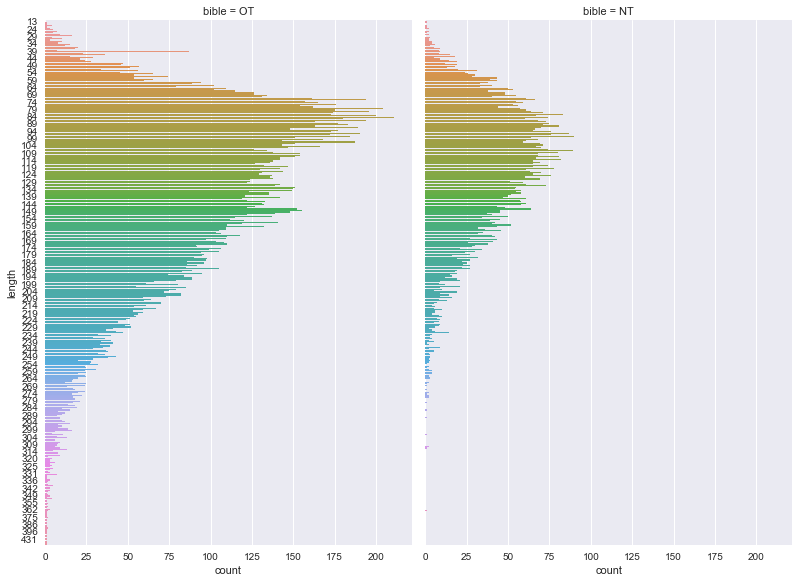

In [20]:
#lets compare the length of verses from both bibles
bible_data['length'] = bible_data.text.apply(len)
ax = sns.factorplot(y="length", 
                   col="bible", 
                   data=bible_data,
                   kind="count",
                   size=8, aspect=.7)
for x in ax.axes.flat:
    labels = x.get_yticklabels() # get y labels
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' # select every 5th label
    x.set_yticklabels(labels) # set new labels
    
print('OT length')
display(bible_data[bible_data.bible == 'OT']['length'].describe())
print('NT length')
display(bible_data[bible_data.bible == 'NT']['length'].describe())

Distribution of verse length is quite similar for both bibles. The OT has some long verses!
As per google, the longest verse in the NT bible is 361 words in *Revelation 20:4.* 
Source: https://www.artbible.info/concordance/#longverses.
Hence, a feature based on the verse length can be a very strong feature.

In [21]:
#creating feature based on verse length
bible_data['length_flag'] = bible_data.text.apply(lambda x : 1 if len(x) > 361 else 0)

### Buliding the classifier

In [22]:
bible_data['bible'] = bible_data.bible.apply(lambda x: 1 if x=='OT' else 0)

In [23]:
#training testing split
X_train, X_test, y_train, y_test = train_test_split(bible_data.drop(['bible'],axis=1), bible_data['bible'], test_size=0.30, random_state=45)
print('Train class split')
display(y_train.value_counts(normalize=True))
print('Training data shape')
display(X_train.shape)
print('Test class split')
display(y_test.value_counts(normalize=True))
print('Test data shape')
display(X_test.shape)

Train class split


1    0.744339
0    0.255661
Name: bible, dtype: float64

Training data shape


(21771, 6)

Test class split


1    0.743757
0    0.256243
Name: bible, dtype: float64

Test data shape


(9331, 6)

In [216]:
#loading w2v pre-trained
model_googlenews = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [219]:
'''
creating textual features - since the length of the texts from both classes is similarly distributed, 
BoW should work fine. tf-idf and w2v also experiemented with.
'''

#BoW vectors
all_train_text = []
for i in X_train.text.apply(text_preprocess):
    all_train_text.append(' '.join(i))
cv = CountVectorizer(encoding='string').fit(all_train_text)
train_cv=cv.transform(all_train_text)
print('The vectorised training matrix has {} words across {} training documents'.format(train_cv.shape[1],train_cv.shape[0]))

#tfidf vectors
tfidf = TfidfTransformer().fit(train_cv)
train_tfidf = tfidf.transform(train_cv)

#w2v trained on bible vocab
#creating w2v embeddings
size = 10
all_train_tokens = list(X_train.text.apply(text_preprocess))
model = gensim.models.Word2Vec(all_train_tokens, size=size)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))
notinw2vtrain = {word : np.zeros(size) for word in cv.vocabulary_.keys() if word not in w2v.keys()}
w2v.update(notinw2vtrain)
all_test_tokens_combined = []
for i in X_test.text.apply(text_preprocess):
    all_test_tokens_combined.extend(i)
notinw2vtest = {word : np.zeros(size) for word in all_test_tokens_combined if word not in w2v.keys()}
w2v.update(notinw2vtest)
train_w2v_bib = [np.mean([w2v[w] for w in words], axis=0) for words in all_train_tokens]

#w2v pre-trained google news
#creating w2v embeddings
w2v_gn = {word:model_googlenews['word'] for word in sum(all_train_tokens, [])}
notinw2vtest = {word : model_googlenews['word'] for word in all_test_tokens_combined if word not in w2v_gn.keys()}
w2v_gn.update(notinw2vtest)
train_w2v_gn = [np.mean([w2v_gn[w] for w in words], axis=0) for words in all_train_tokens]


def text_feature_extractor(test_text, vectoriser):
    all_test_text = []
    for i in test_text.apply(text_preprocess):
        all_test_text.append(' '.join(i))
    if vectoriser == cv:
        return vectoriser.transform(all_test_text)
    elif vectoriser == tfidf:
        return vectoriser.transform(cv.transform(all_test_text))
    elif vectoriser == 'w2v_bib':
        all_test_tokens = list(test_text.apply(text_preprocess))
        return [np.mean([w2v[w] for w in words if w in w2v.keys()], axis=0) for words in all_test_tokens]
    elif vectoriser == 'w2v_gn':
        all_test_tokens = list(test_text.apply(text_preprocess))
        return [np.mean([w2v_gn[w] for w in words if w in w2v_gn.keys()], axis=0) for words in all_test_tokens]

The vectorised training matrix has 10047 words across 21771 training documents


In [25]:
#cross validation funtion
def gridsearchcv(params, clf, X_train, y_train):
    gcv = GridSearchCV(param_grid=params, estimator=clf).fit(X_train, y_train)
    return gcv.best_estimator_

In [51]:
#draw_roc_auc
def roc_auc(y_prob,y_test):
    preds=[prob[1] for prob in y_prob]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(4, 5), dpi=100)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

Training score : 0.9457075926691471
Test score : 0.9262672811059908
Model Parameters :


{'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

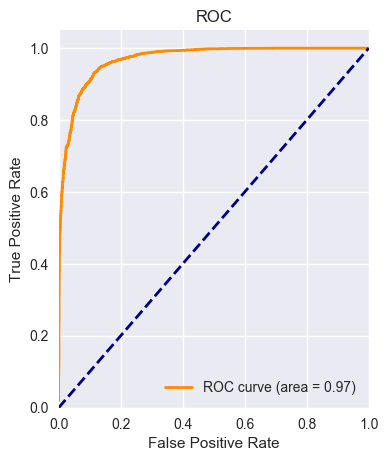

In [180]:
#classification using multinomial NB using BoW features
params = {'alpha':[1,0.1,0.001,0.0001]}
mnb = gridsearchcv(params,MultinomialNB(),train_cv,y_train).fit(train_cv,y_train)
print('Training score : {}'.format(mnb.score(train_cv, y_train)))
print('Test score : {}'.format(mnb.score(text_feature_extractor(X_test.text,cv),y_test)))
print('Model Parameters :')
display(mnb.get_params())
roc_auc(mnb.predict_proba(text_feature_extractor(X_test.text,cv)),y_test)

Training score : 0.9450645353911167
Test score : 0.920694459329118
Model Parameters :


{'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

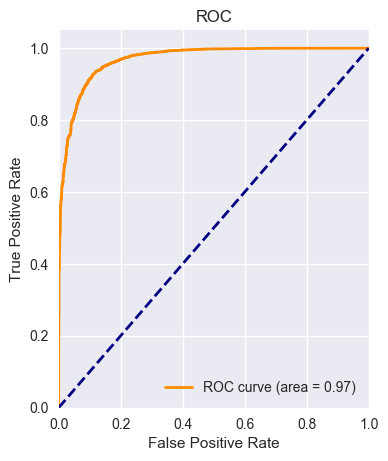

In [181]:
#classification using multinomial NB using tfidf features
params = {'alpha':[1,0.1,0.001,0.0001]}
mnb = gridsearchcv(params,MultinomialNB(),train_tfidf,y_train).fit(train_tfidf,y_train)
print('Training score : {}'.format(mnb.score(train_tfidf, y_train)))
print('Test score : {}'.format(mnb.score(text_feature_extractor(X_test.text,tfidf),y_test)))
print('Model Parameters :')
display(mnb.get_params())
roc_auc(mnb.predict_proba(text_feature_extractor(X_test.text,tfidf)),y_test)

/Users/300002645/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training score : 0.9497955996509118
Test score : 0.9191940842353445
Model Parameters :


{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 50,
 'n_iter': None,
 'n_jobs': 1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': None,
 'verbose': 0,
 'warm_start': False}

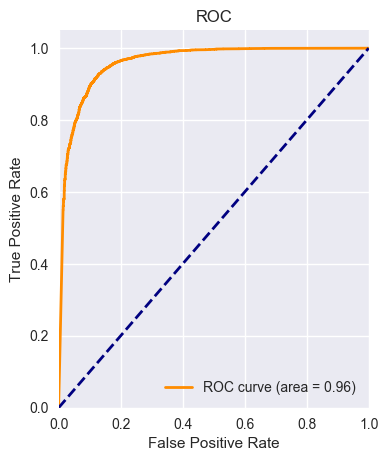

In [182]:
#classification using Linear classifiers (SVM, logistic regression, a.o.) with SGD training using BoW features
params = {'alpha':[1,0.1,0.001,0.0001],
         'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
         'penalty': ['l2', 'l1','elasticnet'],
         'max_iter': [2,5,10,50],
         'class_weight': [None,'balanced']}
sgd = gridsearchcv(params,SGDClassifier(),train_cv,y_train).fit(train_cv,y_train)
print('Training score : {}'.format(sgd.score(train_cv, y_train)))
print('Test score : {}'.format(sgd.score(text_feature_extractor(X_test.text,cv),y_test)))
print('Model Parameters :')
display(sgd.get_params())
roc_auc(sgd.predict_proba(text_feature_extractor(X_test.text,cv)),y_test)

/Users/300002645/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training score : 0.9615543613063249
Test score : 0.9260529418068802
Model Parameters :


{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 50,
 'n_iter': None,
 'n_jobs': 1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': None,
 'verbose': 0,
 'warm_start': False}

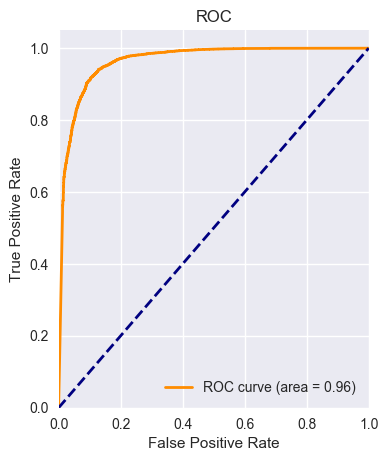

In [183]:
#Best classification results - modified huber loss using SGD

#classification using Linear classifiers (SVM, logistic regression, a.o.) with SGD training using tfidf features
params = {'alpha':[1,0.1,0.001,0.0001],
         'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
         'penalty': ['l2', 'l1','elasticnet'],
         'max_iter': [2,5,10,50],
         'class_weight': [None,'balanced']}
sgd = gridsearchcv(params,SGDClassifier(),train_tfidf,y_train).fit(train_tfidf,y_train)
print('Training score : {}'.format(sgd.score(train_tfidf, y_train)))
print('Test score : {}'.format(sgd.score(text_feature_extractor(X_test.text,tfidf),y_test)))
print('Model Parameters :')
display(sgd.get_params())
roc_auc(sgd.predict_proba(text_feature_extractor(X_test.text,tfidf)),y_test)

Training score : 0.774286895411327
Test score : 0.7740863787375415
Model Parameters :


{'priors': None}

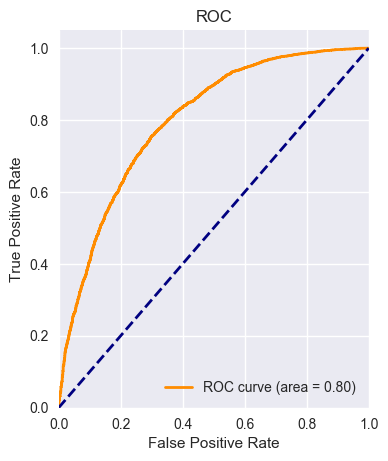

In [230]:
#classification using gaussian NB using w2v embeddings trained on bible text
params = {}
gnb = gridsearchcv(params,GaussianNB(),train_w2v_bib,y_train).fit(train_w2v_bib,y_train)
print('Training score : {}'.format(gnb.score(train_w2v_bib, y_train)))
print('Test score : {}'.format(gnb.score(text_feature_extractor(X_test.text,'w2v_bib'),y_test)))
print('Model Parameters :')
display(gnb.get_params())
roc_auc(gnb.predict_proba(text_feature_extractor(X_test.text,'w2v_bib')),y_test)

/Users/300002645/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training score : 0.811124890909926
Test score : 0.8230629085842889
Model Parameters :


{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 5,
 'n_iter': None,
 'n_jobs': 1,
 'penalty': 'l1',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': None,
 'verbose': 0,
 'warm_start': False}

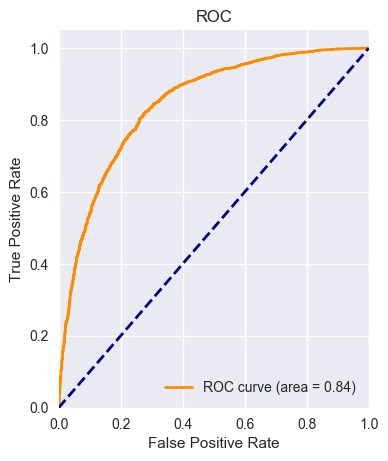

In [218]:
#classification using Linear classifiers (SVM, logistic regression, a.o.) with SGD training using w2v trained on bible text
params = {'alpha':[1,0.1,0.001,0.0001],
         'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
         'penalty': ['l2', 'l1','elasticnet'],
         'max_iter': [2,5,10,50],
         'class_weight': [None,'balanced']}
sgd = gridsearchcv(params,SGDClassifier(),train_w2v_bib,y_train).fit(train_w2v_bib,y_train)
print('Training score : {}'.format(sgd.score(train_w2v_bib, y_train)))
print('Test score : {}'.format(sgd.score(text_feature_extractor(X_test.text,'w2v_bib'),y_test)))
print('Model Parameters :')
display(sgd.get_params())
roc_auc(sgd.predict_proba(text_feature_extractor(X_test.text,'w2v_bib')),y_test)

Training score : 0.9997703366864177
Test score : 0.8357089272318079
Model Parameters :


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

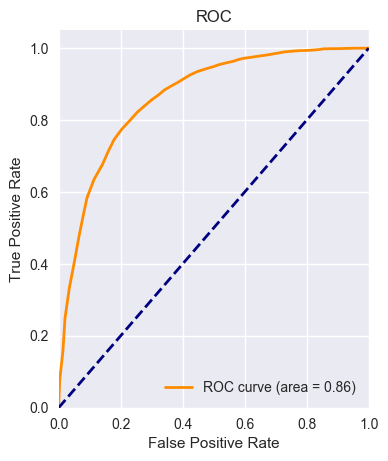

In [245]:
params = {'n_estimators':[5,10,50]}
rf = gridsearchcv(params,RandomForestClassifier(),train_w2v_bib,y_train).fit(train_w2v_bib,y_train)
print('Training score : {}'.format(rf.score(train_w2v_bib, y_train)))
print('Test score : {}'.format(rf.score(text_feature_extractor(X_test.text,'w2v_bib'),y_test)))
print('Model Parameters :')
display(rf.get_params())
roc_auc(rf.predict_proba(text_feature_extractor(X_test.text,'w2v_bib')),y_test)

In [249]:
#cosine similarity between light and dark
display(model['light'])
display(model['dark'])
display(model.similarity('light','dark'))
display(model.most_similar('light'))

array([ 1.78546989, -0.24558699, -0.97350615,  0.97951394,  1.07338917,
        1.01972532, -1.04147577,  1.6754514 , -0.97903341, -0.5359093 ], dtype=float32)

array([ 0.79665875,  0.09433387, -0.33167377,  0.66455132,  0.52135485,
       -0.18311289,  0.05735169,  0.53798497, -0.20785724, -0.19080859], dtype=float32)

0.80515075114552492

[('darkness', 0.971930205821991),
 ('yea', 0.9537572860717773),
 ('neither', 0.9516569375991821),
 ('warning', 0.9457721710205078),
 ('righteous', 0.9442633986473083),
 ('watereth', 0.9403272867202759),
 ('offspring', 0.9393706917762756),
 ('scale', 0.9365931749343872),
 ('abominable', 0.9362257719039917),
 ('increase', 0.9353845119476318)]

In [283]:
# A function that determines part of speech
def show_POS(text):
    nouns = set([])
    for tup in nltk.pos_tag(text.strip().split()):
        if tup[1] in ['NN','NNP']:
            nouns.add(re.sub(r'[^\w\s]','',tup[0]).strip())
    return nouns

In [285]:
bible_data['nouns'] = bible_data.text.apply(show_POS)

In [286]:
bible_data.head(10)

,book,chapter,verse,text,bible,length,length_flag,nouns
0,Genesis,1,1,In the beginning God created the heaven and the earth. \n,1,56,0,"{God, earth, beginning, heaven}"
1,Genesis,1,2,"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. \n",1,144,0,"{darkness, waters, form, God, void, earth, deep, Spirit, face}"
2,Genesis,1,3,"And God said, Let there be light: and there was light. \n",1,56,0,"{God, light}"
3,Genesis,1,4,"And God saw the light, that it was good: and God divided the light from the darkness. \n",1,87,0,"{God, darkness, light}"
4,Genesis,1,5,"And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day. \n",1,117,0,"{darkness, Night, day, Day, evening, morning, light, God}"
5,Genesis,1,6,"And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters. \n",1,114,0,"{God, firmament, waters, midst}"
6,Genesis,1,7,"And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so. \n",1,146,0,"{God, firmament}"
7,Genesis,1,8,And God called the firmament Heaven. And the evening and the morning were the second day. \n,1,91,0,"{Heaven, firmament, day, evening, morning, God}"
8,Genesis,1,9,"And God said, Let the waters under the heaven be gathered together unto one place, and let the dry land appear: and it was so. \n",1,128,0,"{heaven, place, God, land, appear}"
9,Genesis,1,10,And God called the dry land Earth; and the gathering together of the waters called he Seas: and God saw that it was good. \n,1,123,0,"{gathering, Seas, good, Earth, God, together, land}"
